In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
import os
os.environ['PATH_TO_ENV'] = "~/projects/chatsky-llm-autoconfig/.env"

In [10]:
from three_stages_llm import ThreeStagesGraphGenerator as LLMGenerator
from three_stages_algo import ThreeStagesGraphGenerator as AlgoGenerator

In [12]:
from dialogue2graph.pipelines.core.graph import Graph
from dialogue2graph.pipelines.core.dialogue import Dialogue
from dialogue2graph.pipelines.core.dialogue_sampling import RecursiveDialogueSampler
from dialogue2graph.metrics.llm_metrics import compare_graphs
from dialogue2graph.metrics.no_llm_metrics import match_triplets_dg

In [8]:
from settings import EnvSettings
env_settings = EnvSettings()

In [9]:
from langchain.chat_models import ChatOpenAI

In [1]:
import json

In [2]:
with open('transfer.json') as f:
    data = json.load(f)

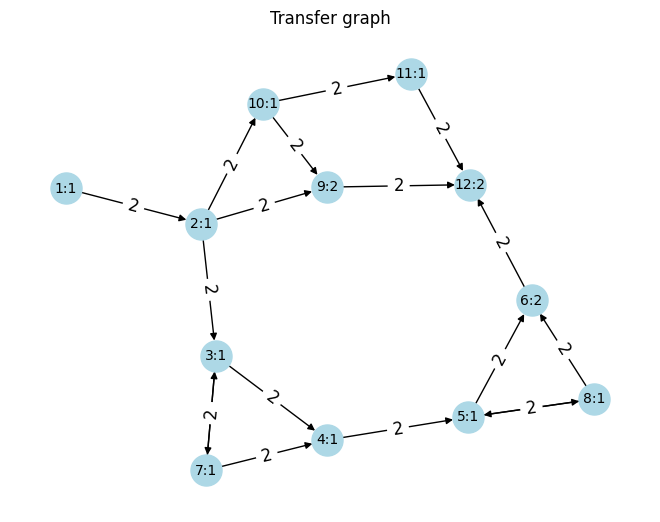

In [22]:
Graph(data['graph']).visualise_short("Transfer graph")

In [22]:
generation_model = ChatOpenAI(model="chatgpt-4o-latest", api_key=env_settings.OPENAI_API_KEY, base_url=env_settings.OPENAI_BASE_URL, temperature=1)
theme_validation_model = ChatOpenAI(model="gpt-3.5-turbo", api_key=env_settings.OPENAI_API_KEY, base_url=env_settings.OPENAI_BASE_URL, temperature=0)
validation_model = ChatOpenAI(model="gpt-3.5-turbo", api_key=env_settings.OPENAI_API_KEY, base_url=env_settings.OPENAI_BASE_URL, temperature=0)

In [11]:
llm_generator = LLMGenerator()

In [14]:
dialogues = [Dialogue().from_list(seq['messages']) for seq in data['dialogues']]

In [19]:
res_graph = llm_generator.invoke(dialogues)

LLM


INFO:httpx:HTTP Request: POST http://193.187.173.33:8002/api/providers/openai/v1/chat/completions "HTTP/1.1 200 OK"
INFO:sentence_transformers.SentenceTransformer:Load pretrained SentenceTransformer: BAAI/bge-m3


NODES:  {'nodes': [{'id': 1, 'label': 'start', 'is_start': True, 'utterances': ['Hey there! How can I help you today?']}, {'id': 2, 'label': 'ask_flight_details', 'is_start': False, 'utterances': ['Sure! I can help with that. When is your flight, and where are you departing from?']}, {'id': 3, 'label': 'ask_pickup_location', 'is_start': False, 'utterances': ['Got it. Where should the driver pick you up?']}, {'id': 4, 'label': 'ask_passenger_count', 'is_start': False, 'utterances': ['Thanks! How many passengers will be traveling?']}, {'id': 5, 'label': 'ask_vehicle_preference', 'is_start': False, 'utterances': ['Alright! Do you have any preference for the type of vehicle? We have sedans, SUVs, and vans available.']}, {'id': 6, 'label': 'confirm_vehicle_change', 'is_start': False, 'utterances': ['Of course! What type of vehicle would you prefer instead?']}, {'id': 7, 'label': 'confirm_booking', 'is_start': False, 'utterances': ['All set! Your driver will arrive on time. Let me know if yo

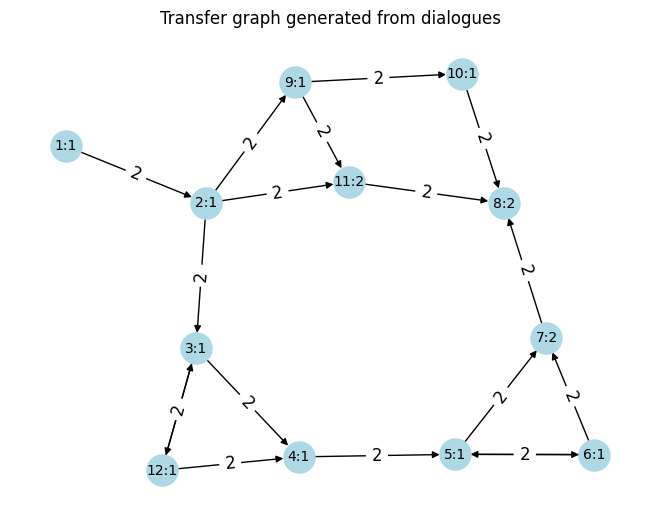

In [20]:
res_graph.visualise_short("Transfer graph generated from dialogues")

In [21]:
compare_graphs(res_graph,Graph(data['graph']))

INFO:sentence_transformers.SentenceTransformer:Load pretrained SentenceTransformer: BAAI/bge-m3


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

{'value': True,
 'description': 'Nodes similarity: 0.9999998211860657, Nodes+edges similarity: 0.9464239478111267'}

In [23]:
algo_generator = AlgoGenerator()

In [24]:
res_graph = algo_generator.invoke(dialogues, model_name="gpt-4o")

LISTS_N:  [(0, ['I need to book a ride to the airport.', 'Can you help me arrange an airport transfer?']), (1, ['My flight is on Saturday at 10 AM from JFK.', 'Departure is from LAX tomorrow at 6 PM.', 'Do you have any other options?', 'Can I just take a taxi instead?', "Never mind, I'll figure it out myself.", 'Actually, I changed my mind. Thanks anyway.']), (2, ['Pickup is from my home in Brooklyn.', "I'd like to be picked up from my hotel.", 'Actually, I need to change my pickup location.', 'Hold on, pickup should be from my office instead.']), (3, ["It's just me traveling.", 'There will be three of us.']), (4, ['Actually, can I change my vehicle type?', 'A sedan would be fine.', 'I think an SUV would be more comfortable.', 'Wait, I think I need a bigger car.']), (5, ['On second thought, my original choice is fine.', 'You know what? Never mind changing it.', 'A van would be better.', "I'll go with an SUV instead."]), (6, ["No, that's it! Thanks a lot.", "Thanks, I'm all set."]), (7,

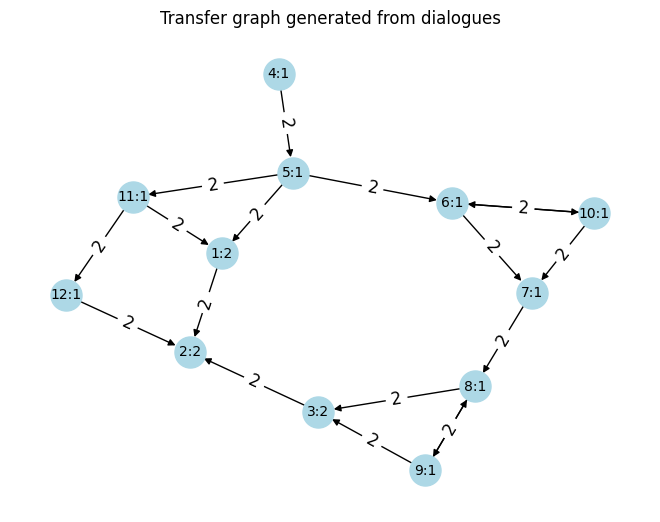

In [25]:
res_graph.visualise_short("Transfer graph generated from dialogues")

In [27]:
compare_graphs(res_graph,Graph(data['graph']))

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

{'value': True,
 'description': 'Nodes similarity: 0.9866758584976196, Nodes+edges similarity: 0.9464239478111267'}

In [ ]:
res_graph = algo_generator.invoke(dias, model_name="gpt-4o", temp=0)

In [ ]:
compare_graphs(res_graph,Graph(graph[0]['graph']))

In [ ]:
match_triplets_dg(Graph(graph_c), dias)

In [ ]:
dias = sampler.invoke(Graph(graph_example),5)

In [ ]:
match_triplets_dg(Graph(graph_c), dias)

In [22]:
from dialogue2graph.metrics.no_llm_metrics import dialogues_are_valid_paths

In [ ]:
dialogues_are_valid_paths(Graph(graph_c), dias)

In [ ]:
dias = sampler.invoke(Graph(graph_example),5)

In [ ]:
dialogues_are_valid_paths(Graph(graph_c), dias)